# Predicting the Survival of passengers on Titanic using ML estimators

This notebook is in referenc to Kaggle competition " https://www.kaggle.com/c/titanic/overview/evaluation ".

## 1. Importing necessary packages & data

In [1]:
# Manipulating & plotting packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Estimator
from sklearn.ensemble import RandomForestClassifier

# Splitting data into 2 sets
from sklearn.model_selection import train_test_split

# Tunning hyperparameters
from sklearn.model_selection import GridSearchCV

# Evaluating Model
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import plot_roc_curve

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train_data = pd.read_csv("drive/My Drive/Titanic/train.csv")
test_data = pd.read_csv('drive/My Drive/Titanic/test.csv')

## 2. Data Analysis & Manipulation

  `List of Techniques`:

     * Imputation
     * Handling Outliers
     * Binning
     * Log Transform
     * One-Hot Encoding
     * Grouping Operations
     * Feature Split
     * Scaling
     * Extracting Date

Among these techniques, choose the techniques best suited for your model.



In [3]:
train_data.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22,38,26,35,35
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


In [4]:
train_data.var()

PassengerId    66231.000000
Survived           0.236772
Pclass             0.699015
Age              211.019125
SibSp              1.216043
Parch              0.649728
Fare            2469.436846
dtype: float64

In [5]:
train_data.isna().sum()/len(train_data)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [6]:
train_data.drop(['PassengerId','Name','Cabin'],axis=1,inplace=True)

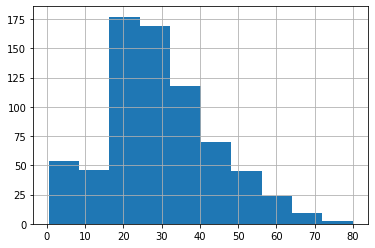

In [7]:
train_data.Age.hist();

In [8]:
train_data.head().T

,0,1,2,3,4
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Sex,male,female,female,female,male
Age,22,38,26,35,35
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05
Embarked,S,C,S,S,S


In [9]:
train_data.Fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

In [10]:
pd.crosstab(train_data.Sex,train_data.Survived,margins=True,margins_name='Total')

Survived,0,1,Total
Sex,,,
female,81,233,314
male,468,109,577
Total,549,342,891


In [11]:
train_data.Pclass.value_counts

<bound method IndexOpsMixin.value_counts of 0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64>

In [12]:
pd.crosstab(train_data['Pclass'],train_data['Survived'],margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [13]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [15]:
train_data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
pd.crosstab(train_data.Embarked,train_data.Survived,margins=True)

Survived,0,1,All
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,217,644
All,549,340,889


In [17]:
#filling in missing values

train_data['Age'].fillna(train_data['Age'].mean(),inplace=True)

In [18]:
#to fill non-numeric missing values 
train_data['Embarked'].fillna(train_data['Embarked'].value_counts().idxmax(),inplace=True)

In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [20]:
print("Non-Nummeric Features are :")
for feature,content in train_data.items():
  if pd.api.types.is_string_dtype(content):
    print(feature)



Non-Nummeric Features are :
Sex
Ticket
Embarked


In [21]:
#Converting non-numeric into numeric type
for feature,content in train_data.items():
  if pd.api.types.is_string_dtype(content):
    #Converting into categories
    train_data[feature] = content.astype('category').cat.as_ordered()
    #converting categories into codes
    train_data[feature] = pd.Categorical(content).codes    

In [22]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int8   
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    int16  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    int8   
dtypes: float64(2), int16(1), int64(4), int8(2)
memory usage: 45.4 KB


In [23]:
#Spliting the data into X & y
X = train_data.drop('Survived',axis=1)
y = train_data['Survived']

#Splitting the data into Train & Validation sets
X_train,X_val,y_train,y_val = train_test_split(X,y,random_state=42,test_size=0.2)

X_train.shape,X_val.shape,y_train.shape,y_val.shape

((712, 8), (179, 8), (712,), (179,))

## 3. Training Model

In [24]:
rd = RandomForestClassifier(n_estimators = 15,random_state=0,max_depth=5)

In [25]:
rd.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [26]:
rd.score(X_val,y_val),rd.score(X_train,y_train)

(0.8156424581005587, 0.8665730337078652)

## 4. Hyperparameter Tunning

In [27]:
#now use GridSearchCV to find the best set of hyperparameters
grid = {'n_estimators':[13,15,20],
        'max_depth':[5,7,None],
        'min_samples_split':[2,4,7],
        'min_samples_leaf':[1,3,5]}

gd = GridSearchCV(rd,
                  param_grid = grid,
                  cv=4,
                  verbose=2)

In [28]:
gd.fit(X_train,y_train)

Fitting 4 folds for each of 81 candidates, totalling 324 fits
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=13 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=13, total=   0.0s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=13 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=13, total=   0.0s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=13 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=13, total=   0.0s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=13 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=13, total=   0.0s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=15 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=15, total=   0.0s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=15 
[CV]  max_depth=5, min_samp

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=15, total=   0.0s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=15 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=15, total=   0.0s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=20, total=   0.0s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=20, total=   0.0s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=20, total=   0.1s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=20, total=   0.0s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=13

[Parallel(n_jobs=1)]: Done 324 out of 324 | elapsed:   10.4s finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=5,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=15, n_jobs=None,
                                              oob_score=False, random_state=0,
                                       

In [29]:
gd.score(X_val,y_val),gd.score(X_train,y_train)

(0.8156424581005587, 0.898876404494382)

In [30]:
gd.best_params_

{'max_depth': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 20}

In [31]:
corr_data = train_data.corr()

## 5. Evaluating Model

In [32]:
pred_val = rd.predict(X_val)
cls = pd.DataFrame(classification_report(pred_val,y_val,output_dict=True))
cls

,0,1,accuracy,macro avg,weighted avg
precision,0.904762,0.689189,0.815642,0.796976,0.831299
recall,0.805085,0.836066,0.815642,0.820575,0.815642
f1-score,0.852018,0.755556,0.815642,0.803787,0.819145
support,118.000000,61.000000,0.815642,179.000000,179.000000


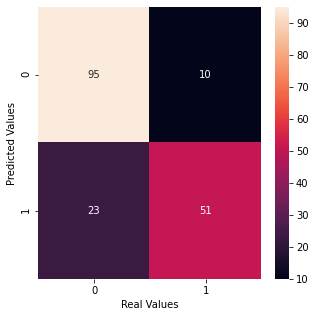

In [33]:
fig,ax=plt.subplots(figsize=(5,5))
ax=sns.heatmap(confusion_matrix(y_val,pred_val),annot=True)
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.show();

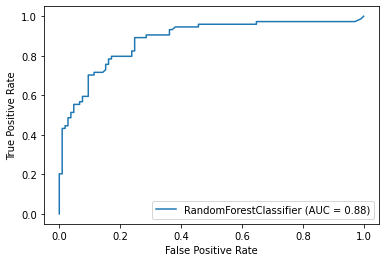

In [34]:
plot_roc_curve(rd,X_val,y_val)
plt.show()

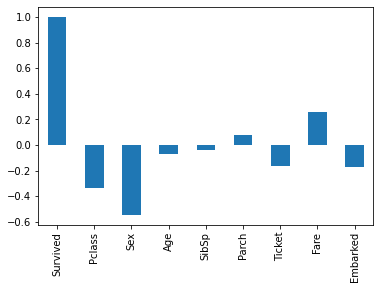

In [35]:
corr_data['Survived'].plot(kind='bar')

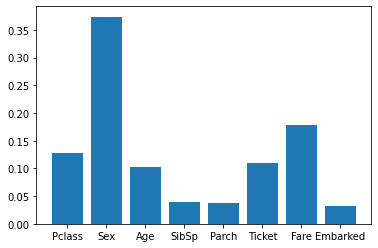

In [36]:
df=pd.DataFrame({'Importance':rd.feature_importances_,
                 'features':X_train.columns})
plt.bar(X_train.columns,rd.feature_importances_);

## 6. Predicting the Output

In [37]:
# now test data must of same dimensions as training data
test_passid = test_data['PassengerId']
test_data.drop(['PassengerId','Cabin','Name'],axis=1,inplace=True)
test_data.shape

(418, 8)

In [38]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Ticket    418 non-null    object 
 6   Fare      417 non-null    float64
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 26.2+ KB


In [39]:
#filling missing numerical
test_data['Age'].fillna(test_data['Age'].mean(),inplace=True)

In [40]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Ticket    418 non-null    object 
 6   Fare      417 non-null    float64
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 26.2+ KB


In [41]:
test_data.Fare.value_counts()

7.7500     21
26.0000    19
8.0500     17
13.0000    17
7.8958     11
           ..
9.3250      1
14.4583     1
15.0333     1
25.4667     1
21.0750     1
Name: Fare, Length: 169, dtype: int64

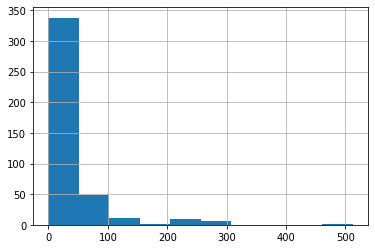

In [42]:
test_data.Fare.hist();

In [43]:
test_data.Fare.max()

512.3292

In [44]:
test_data.Fare.mean(),test_data.Fare.median()

(35.6271884892086, 14.4542)

In [45]:
test_data.Fare.fillna(test_data.Fare.median(),inplace=True)

In [46]:
#convert non-numeric features into numeric
for features,content in test_data.items():
  if pd.api.types.is_string_dtype(content):
    test_data[features] = content.astype('category').cat.as_ordered()
    test_data[features] = pd.Categorical(content).codes

In [47]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int8   
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Ticket    418 non-null    int16  
 6   Fare      418 non-null    float64
 7   Embarked  418 non-null    int8   
dtypes: float64(2), int16(1), int64(3), int8(2)
memory usage: 18.1 KB


In [48]:
pred_test = rd.predict(test_data)
pred_test

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [49]:
output_df = (pd.DataFrame({'PassengerId':test_passid,
                   'Survived':pred_test})).sort_values(by='PassengerId')
output_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
